In [1]:
import numpy as np
import pandas as pd
import akshare as ak
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
from scipy.optimize import minimize
import time
import re

import warnings
warnings.filterwarnings("ignore")

In [2]:
start_date = pd.to_datetime("20230101")
open_time = pd.to_datetime(dt.date.today().strftime("%Y-%m-%d ") + "09:00:00")
close_time = pd.to_datetime(dt.date.today().strftime("%Y-%m-%d ") + "15:00:00")

In [3]:
from IPython.utils import io

with io.capture_output() as captured:
    dce_text = ak.match_main_contract(symbol="dce")
    czce_text = ak.match_main_contract(symbol="czce")
    shfe_text = ak.match_main_contract(symbol="shfe")
    gfex_text = ak.match_main_contract(symbol="gfex")

symbol_list = ",".join([dce_text, czce_text, shfe_text, gfex_text]).split(',')
underlying_list = [''.join(re.findall(r'[A-Z]', symbol)) for symbol in symbol_list]

In [4]:
all_data = pd.DataFrame()
for underlying in underlying_list:
    data = ak.futures_zh_daily_sina(underlying+'0')
    if len(data.index) < 126:
        continue
    data = data.set_index("date", drop=True)
    data.index = pd.to_datetime(data.index)
    intra_ret = (data["close"] - data["open"]) / data["open"]
    intra_ret = intra_ret[intra_ret.index[intra_ret.index >= start_date]]
    intra_ret.name = underlying
    all_data = pd.concat([all_data, intra_ret], axis=1)

all_data

,V,P,B,M,I,JD,L,PP,FB,BB,...,NR,SS,LU,BC,AO,BR,EC,SI,LC,PS
2023-01-03 00:00:00,0.010383,-0.001447,0.006961,0.002033,-0.006418,-0.003004,0.006380,0.010666,0.009680,NaN,...,0.019092,0.000593,-0.014142,-0.010464,NaN,NaN,NaN,-0.005596,NaN,NaN
2023-01-04 00:00:00,-0.013597,-0.006280,-0.005029,-0.019528,-0.007038,0.002782,-0.013928,-0.007031,0.006395,NaN,...,0.002026,-0.000590,-0.053291,-0.014398,NaN,NaN,NaN,-0.004234,NaN,NaN
2023-01-05 00:00:00,0.001288,-0.007335,-0.008585,-0.007770,-0.001189,0.010624,-0.002740,-0.002463,-0.005955,NaN,...,-0.005061,-0.014252,-0.007376,0.002812,NaN,NaN,NaN,-0.001703,NaN,NaN
2023-01-06 00:00:00,0.023558,0.002211,-0.007854,-0.008616,0.011834,0.000000,0.002497,-0.003883,0.003195,NaN,...,-0.016244,0.002100,0.000528,0.009018,NaN,NaN,NaN,0.016543,NaN,NaN
2023-01-09 00:00:00,-0.001098,-0.013340,-0.001188,0.008450,-0.026036,-0.002288,-0.000998,-0.005460,0.012370,NaN,...,-0.012807,0.020677,-0.002929,0.022684,NaN,NaN,NaN,-0.008683,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16 00:00:00,0.005270,0.004236,-0.000536,-0.001641,0.004375,-0.011746,0.000277,0.000000,-0.007528,0.000339,...,0.000787,-0.008410,0.005033,0.001394,0.011545,0.000857,-0.007046,-0.009444,-0.009743,-0.034712
2025-09-17 00:00:00,0.001410,-0.011538,-0.014730,-0.013149,0.000622,0.005810,-0.000965,0.000717,0.001199,-0.001361,...,-0.009831,-0.002699,0.009927,-0.006811,-0.015091,-0.008978,-0.035043,0.007870,0.006561,-0.003261
2025-09-18 00:00:00,-0.010452,-0.011054,-0.006245,-0.004987,-0.006211,0.007074,-0.006496,-0.008163,0.003197,-0.004767,...,-0.019920,-0.003483,-0.008144,-0.005917,-0.004416,-0.013397,-0.003694,-0.001682,-0.003282,0.000094
2025-09-19 00:00:00,0.004668,0.000215,0.010932,0.006344,0.006231,-0.005751,-0.004582,-0.002309,-0.000399,NaN,...,-0.004049,-0.001553,-0.009056,0.001839,0.007506,-0.002614,-0.049321,0.047271,0.020138,-0.012461


In [5]:
corr = all_data.corr()
si_corr = corr["SI"]
si_corr = si_corr[si_corr.index != "SI"].fillna(0).sort_values(ascending=False).iloc[:20]
other_corr = corr[si_corr.index]
other_corr = other_corr.loc[si_corr.index, :].fillna(0)

# deal with multicollinearity
threshold = 0.7
upper_triangle = other_corr.corr().where(np.triu(np.ones(other_corr.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
si_corr = si_corr.drop(to_drop)
other_corr = other_corr.drop(to_drop)
other_corr = other_corr[other_corr.index]

# learn a set of weight
def objective(w: pd.Series):
    numerator = np.dot(w, si_corr)
    denominator = np.sqrt(np.dot(w, np.dot(other_corr, w)))
    return -numerator / denominator

constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
w0 = np.ones(len(si_corr)) / len(si_corr)

result = minimize(objective, w0, method='SLSQP', constraints=constraints)

In [6]:
pd.DataFrame(result.x, index=si_corr.index).to_json("index_weight.json")

In [7]:
def get_minute(symbol: str):

    data = ak.futures_zh_minute_sina(symbol)
    data = data.set_index("datetime", drop=True)
    data.index = pd.to_datetime(data.index)
    data = data[data.index.map(lambda x: x.date()) == dt.date.today()]
    minute_price = data["close"]
    minute_price = minute_price[minute_price.index >= open_time]
    minute_price.loc[open_time] = data["open"].iloc[0]
    minute_price = minute_price.sort_index()
    minute_price.name = ''.join(re.findall(r'[A-Z]', symbol))
    
    return minute_price

def calculate_index():

    all_data = pd.DataFrame()
    for symbol in symbol_list:
        if ''.join(re.findall(r'[A-Z]', symbol)) in other_corr.index:
            data = get_minute(symbol)
            data = (data.diff() / data.shift()).fillna(0)
            all_data = pd.concat([all_data, data], axis=1).fillna(0)
    
    all_data = all_data[si_corr.index]
    index = (all_data.apply(lambda x: np.dot(result.x, x), axis=1) + 1).cumprod()
    index = index[(index.index >= open_time) & (index.index <= close_time)].asfreq("1min")

    return index

In [8]:
si_dom = None
for symbol in symbol_list:
    if symbol[:2] == "SI":
        si_dom = symbol
        break

In [9]:
def get_minute_si():

    if si_dom == None:
        raise ValueError("No dominant contract loaded!")

    data = ak.futures_zh_minute_sina(si_dom)
    data = data.set_index("datetime", drop=True)
    data.index = pd.to_datetime(data.index)
    data = data[data.index.map(lambda x: x.date()) == dt.date.today()]

    minute_price = data["close"].asfreq("1min")
    vwap = (data["close"] * data["volume"]).cumsum() / data["volume"].cumsum().asfreq("1min")
    volume = data["volume"].asfreq("1min")

    minute_price.loc[open_time] = data["open"].iloc[0]
    minute_price = minute_price.sort_index()
    vwap.loc[open_time] = data["open"].iloc[0]
    vwap = vwap.sort_index()
    
    return minute_price, vwap, volume

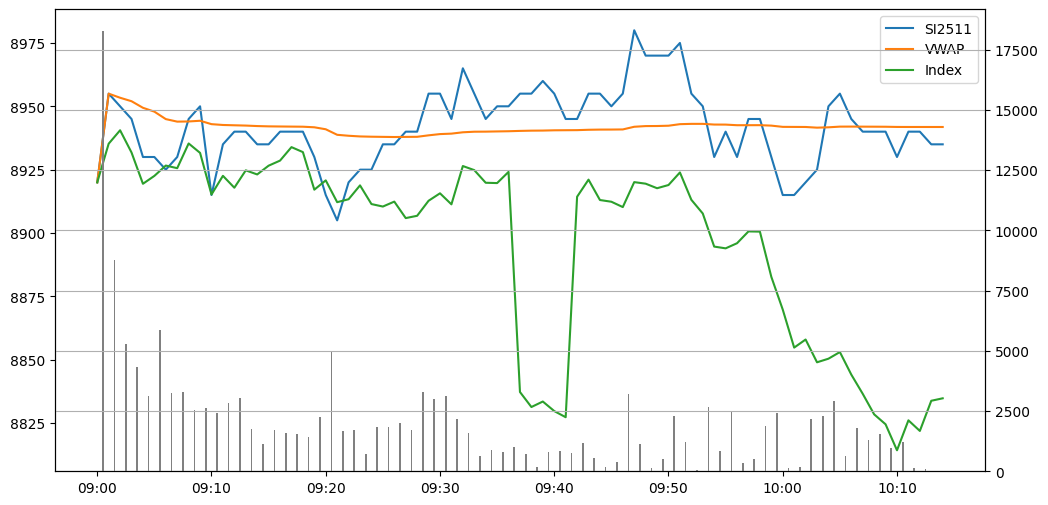

In [31]:
minute_price, vwap, volume = get_minute_si()
index = calculate_index() * minute_price.iloc[0]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(minute_price, label="SI2511")
ax1.plot(vwap, label="VWAP")
ax1.plot(index, label="Index")
ax2 = ax1.twinx()
ax2.bar(volume.index - pd.Timedelta(seconds=30), volume, color="grey", width=1e-4)
ax1.legend()
plt.gca().xaxis.set_major_formatter(mdt.DateFormatter('%H:%M'))
plt.grid(True)
plt.show()